[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Sample cleaned summaries:
 0    super bass good sound quality also good value ...
1    super qality best design loved even parent als...
2    according price bass quality decent built qual...
3    boat time fav one sound quality good bass okay...
4    best home theatre sound quality super clean ho...
Name: clean_summary, dtype: object


 FOR LOGISTIC REGRESSION:

Classification Report:               precision    recall  f1-score   support

    Negative       0.93      0.73      0.82       177
     Neutral       0.88      0.63      0.74       192
    Positive       0.95      0.99      0.97      2072

    accuracy                           0.95      2441
   macro avg       0.92      0.78      0.84      2441
weighted avg       0.94      0.95      0.94      2441


Confusion Matrix: [[ 129   11   37]
 [   2  121   69]
 [   7    5 2060]]


 FOR SUPPORT VECTOR CLASSIFIER:

Classification Report:               precision    recall  f1-score   support

    Negative       0.96      0.42      0.59

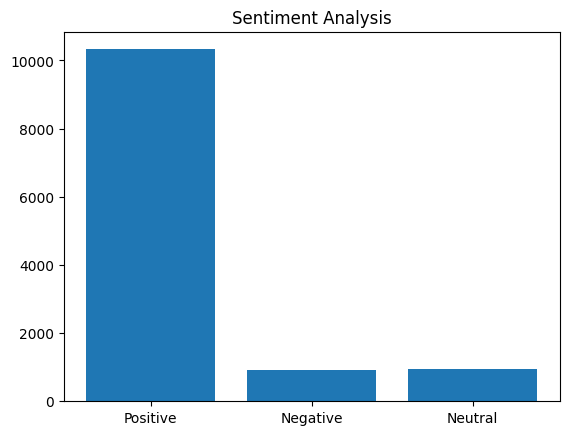

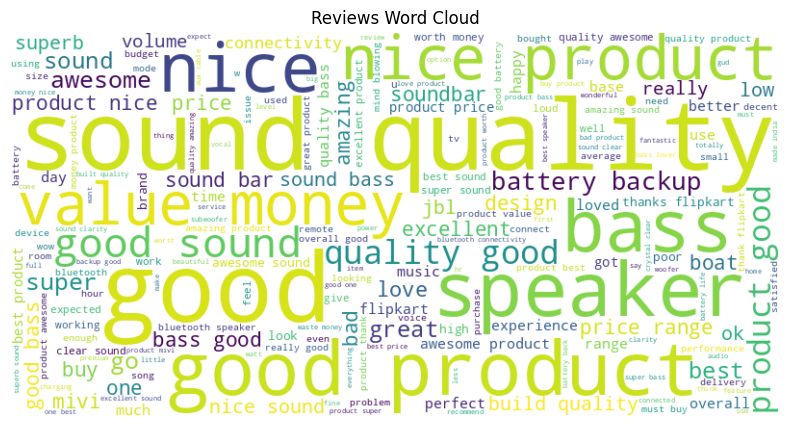

In [4]:
#Downloaded and imported the dependencies
import pandas as pd
import numpy as np
import re
import nltk
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer #To change text to numerical vectors for feature extraction
from sklearn.linear_model import LogisticRegression #LogisticRegression for classification
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.model_selection import train_test_split  #Splitting for training and testing
from sklearn.metrics import confusion_matrix, classification_report #Prediction report
from wordcloud import WordCloud
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


#Dataset from Kaggle: Bluetooth-speakers.csv
#REVIEWS OF BLUETOOTH SPEAKERS

#TASK 1: DATA PREPROCESSING

#Loading the CSV file into a Pandas dataframe with default encoding
df = pd.read_csv("Bluetooth-speakers.csv", encoding='unicode_escape')

#Removing empty entries from the dataset
df = df.dropna()

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower() #Converted the text into lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text)  #Removed punctuations, numbers, and special characters
    words = text.split()  #Tokenized
    words = [w for w in words if w not in stop_words] #Removed stopwords
    words = [lemmatizer.lemmatize(word) for word in words]  #Performed lemmatization
    return " ".join(words)

df['clean_summary'] = df['Summary'].apply(clean_text)
print("Sample cleaned summaries:\n", df['clean_summary'].head())

labels = []

count_p = 0
count_n = 0
count_neu = 0

analyzer = SentimentIntensityAnalyzer()
for review in df['clean_summary']:
  scores = analyzer.polarity_scores(review)
  if scores['compound'] < 0:
    labels.append("Negative")
    count_n+=1
  elif scores['compound'] > 0:
    labels.append("Positive")
    count_p+=1
  else:
    labels.append("Neutral")
    count_neu+=1

df['label'] = labels

#TASK 2: FEATURE EXTRACTION USING TF-IDF

#Converting text to numerical vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_summary']) #X entries
y = df['label'] #Y entries

#TASK 3: MODEL BUILDING

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)  #Test size is 20%; therefore train dataset size is 80%

#Training logistic regression and SVM
lr = LogisticRegression(max_iter=1000, random_state=42)
svc = SVC(kernel='poly', random_state=42)

lr.fit(X_train,y_train)
svc.fit(X_train,y_train)

#Predicting
y_pred=lr.predict(X_test)
y_pred_svc=svc.predict(X_test)

#TASK 4: EVALUATION

#Evaluating
print("\n\n FOR LOGISTIC REGRESSION:")
print("\nClassification Report:",classification_report(y_test,y_pred))
print("\nConfusion Matrix:", confusion_matrix(y_test,y_pred))

print("\n\n FOR SUPPORT VECTOR CLASSIFIER:")
print("\nClassification Report:", classification_report(y_test,y_pred_svc))
print("\nConfusion Matrix:", confusion_matrix(y_test,y_pred_svc))

#TASK 5: VISUALIZATION

plt.bar(["Positive", "Negative", "Neutral"], [count_p, count_n, count_neu])
plt.title("Sentiment Analysis")
plt.show()

#Word Cloud
text = " ".join(df['clean_summary'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image
plt.figure(figsize=(10, 5)) # Adjust figure size for better display
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Turn off axis labels
plt.title("Reviews Word Cloud")
plt.show()
